# Final Notebook
## By Brian Kohaya

This notebook primarily looks at land usage in Chinatown and how its has changed between 2006 and 2021. Many parts of the code are designed to be easily change the variable to quickly obtain maps or data. 

Due to the large size of the entire data set, we split the data into individual notebooks for our years of interest. Due to this, the code that follows reflects the data for the year 2021. In the notebooks for the other years, the code is slightly different to reflect the change in year

Import libraries

In [58]:
# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

Import the data and create a dataframe

In [59]:
AD21 = gpd.read_file('AD21.geojson')

# Land Use
## This section of my data looks at building use at a more general level using the 'UseType' column of the Assessor's Office data

Clip the data to make it more manageable

In [60]:
columns_to_keep = ['SitusAddre','UseType', 'UseDescrip', 'geometry']

create a new dataframe using the clipped data

In [61]:
AD21_clipped = AD21[columns_to_keep]

Let's check what the data looks like now. This will be a lot more manageable in the long run

In [62]:
AD21_clipped.head()

,SitusAddre,UseType,UseDescrip,geometry
0,999 N BROADWAY,Commercial,Hotel & Motels,"POLYGON Z ((-118.23615 34.06662 0.00000, -118...."
1,918 W COLLEGE ST 317,Residential,Single,"POLYGON Z ((-118.24515 34.06608 0.00000, -118...."
2,908 AVILA ST,Industrial,Heavy Manufacturing,"POLYGON Z ((-118.23247 34.05774 0.00000, -118...."
3,716 NEW DEPOT ST A,Residential,Single,"POLYGON Z ((-118.24270 34.06474 0.00000, -118...."
4,734 N HILL PL,Residential,Two Units,"POLYGON Z ((-118.24245 34.06255 0.00000, -118...."


Create a simple chart to see the frequency of each use type. 

In [63]:
building_counts = AD21_clipped.value_counts(['UseType']).reset_index(name="count")
building_counts

,UseType,count
0,Residential,612
1,Commercial,347
2,Industrial,133
3,Government,49
4,Miscellaneous,40
5,Institutional,14
6,Recreational,10


Let's make the chart look nice. Create a chart of the different land use types

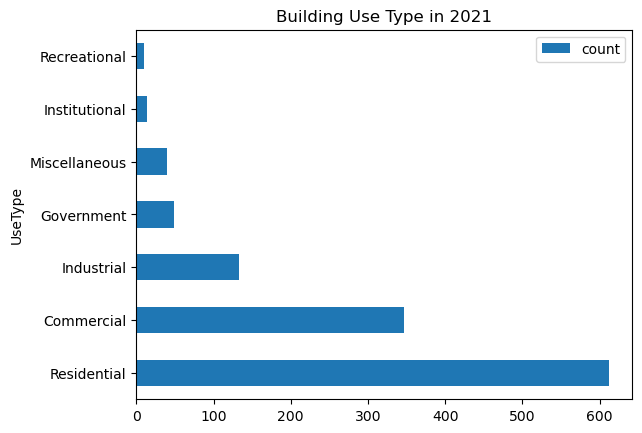

In [64]:
building_counts.plot.barh(x='UseType',
                        title = 'Building Use Type in 2021');

This map is a high-level overview of land usage in Chinatown by general usage. As we looked closer at the data, we saw that the data does not take into consideration mixed-use buildings such as the Blossom Apartments. When we investigated further, we saw that Blossom Apartments is lsited solely as 'Commercial' in this data set. We will be investigating how to further disaggregate this data

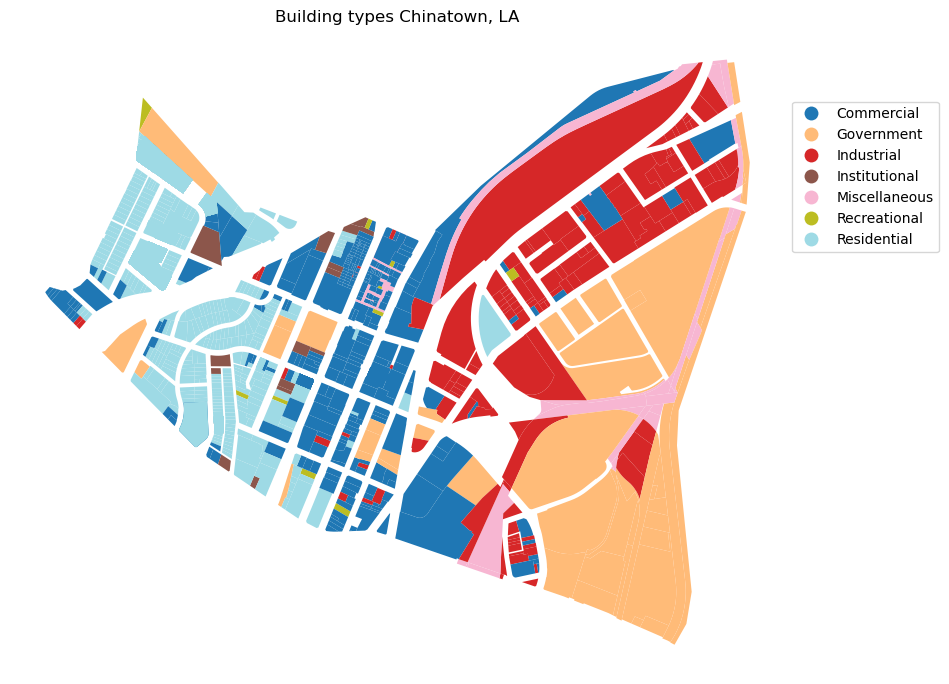

In [65]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
AD21_clipped.plot(ax=ax,
         column='UseType',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types Chinatown, LA')

# get rid of the axis
ax.axis('off');

Get min/max bounds of lat/lon

In [66]:
minx = AD21_clipped.total_bounds[0]
miny = AD21_clipped.total_bounds[1]
maxx = AD21_clipped.total_bounds[2]
maxy = AD21_clipped.total_bounds[3]

This line of code can be used to query the data and obtain information about a specific use type. Just to keep the notebook clean, it is currently set to "None." This section can be changed to query the data by the use type.

In [67]:
AD21_clipped[AD21_clipped.UseType == None]

,SitusAddre,UseType,UseDescrip,geometry


Create variable to loop data

In [68]:
buildingtypes = AD21_clipped['UseType'].unique().tolist()
buildingtypes = ['Commercial',
 'Residential',
 'Industrial',
 'Miscellaneous',
 'Government',
 'Institutional',
 'Recreational']


Loop through building types. This loop creates maps of the seven types of building use listed under "UseType".

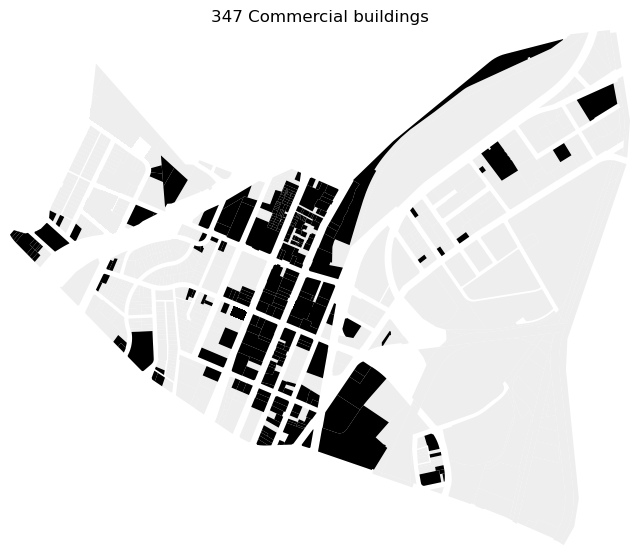

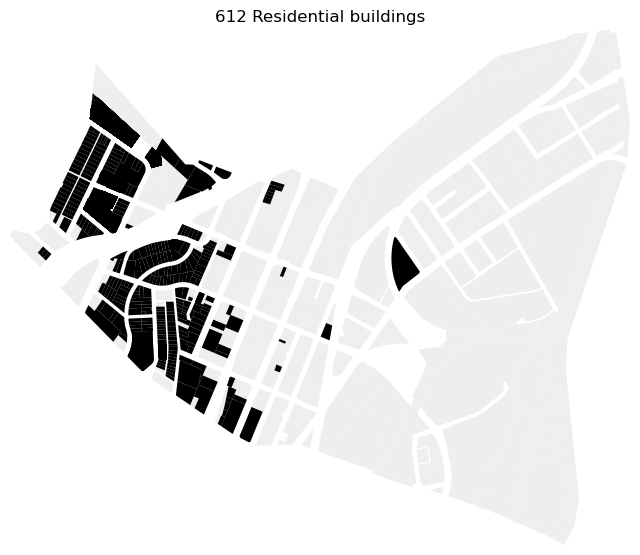

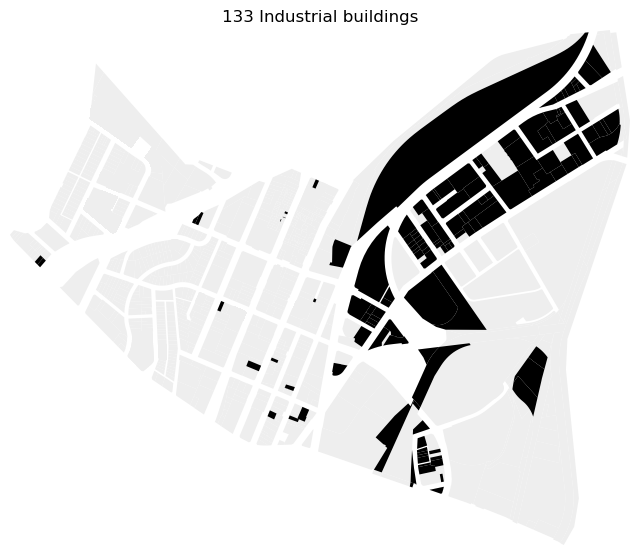

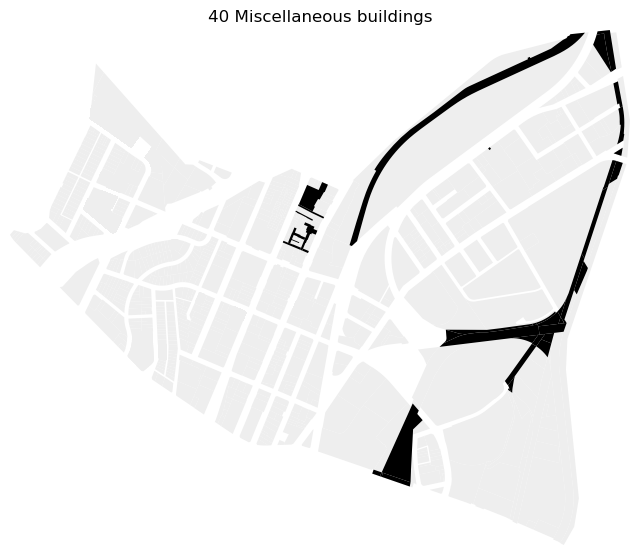

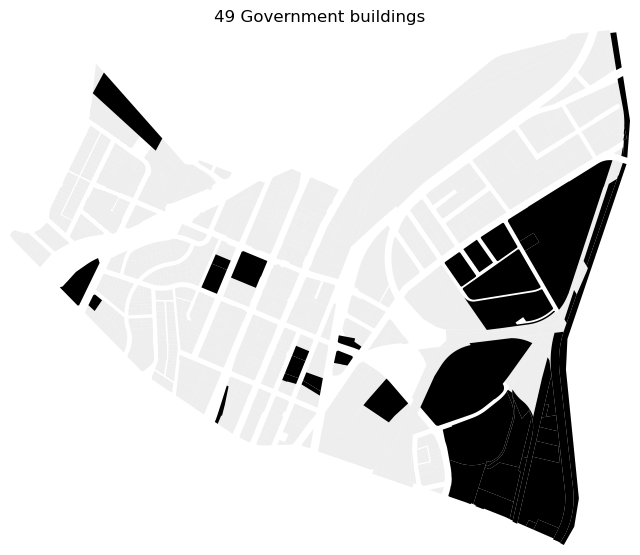

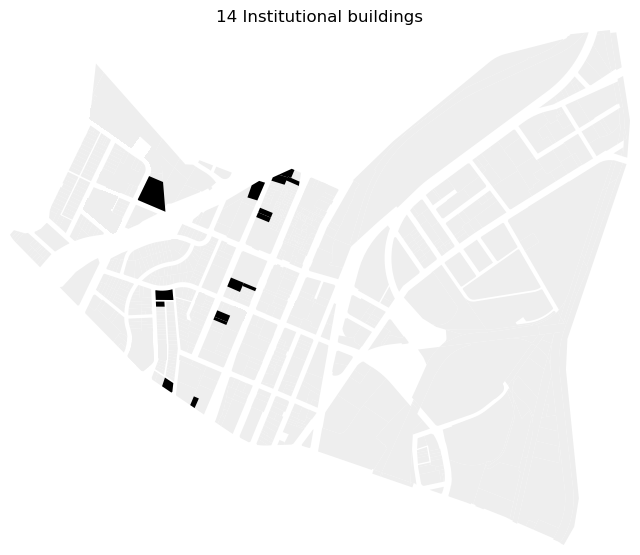

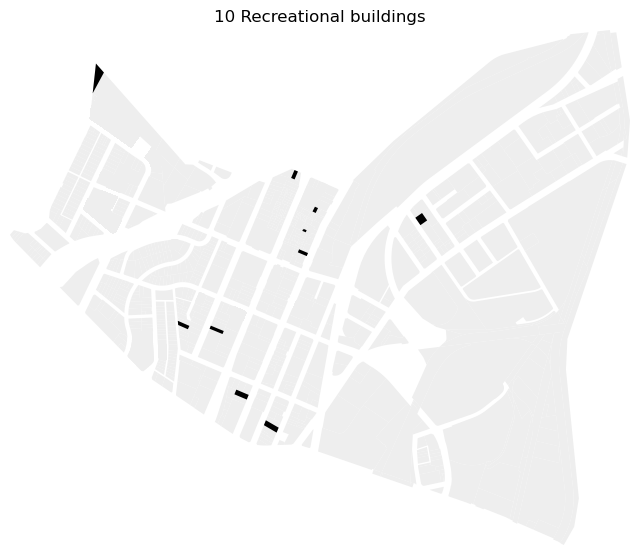

In [69]:
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(8,8))

    # create the map plot
    AD21_clipped.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    AD21_clipped[AD21_clipped['UseType'] == type].plot(ax=ax,
            # column='building',
            color='black')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    number_of_buildings = len(AD21_clipped[AD21_clipped['UseType']==type])
    ax.set_title(str(number_of_buildings) + ' ' + str(type) + ' buildings')

    # get rid of the axis
    ax.axis('off');

Import a matlab patch ot manually create the legend for the map

In [70]:
import matplotlib.patches as mpatches

Create a map that merges multiple layers of the above data

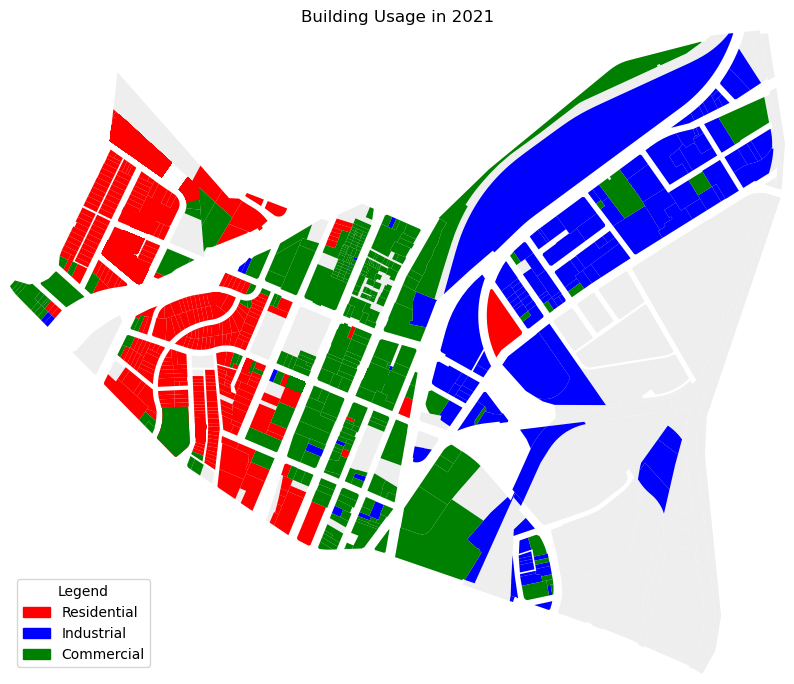

In [71]:
    fig, ax = plt.subplots(figsize=(10,10))
    
    # create the map plot
    AD21_clipped.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    AD21_clipped[AD21_clipped['UseType'] == 'Residential'].plot(ax=ax,
            # column='building',
            color='red')
    
    AD21_clipped[AD21_clipped['UseType'] == 'Industrial'].plot(ax=ax,
            # column='building',
            color='blue')
        
    AD21_clipped[AD21_clipped['UseType'] == 'Commercial'].plot(ax=ax,
            # column='building',
            color='green')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    ax.set_title('Building Usage in 2021')

    # get rid of the axis
    ax.axis('off')
    
    # Create a legend
    
    red_patch = mpatches.Patch(color='red', label='Residential')
    blue_patch = mpatches.Patch(color='blue', label='Industrial')
    green_patch= mpatches.Patch(color='green', label='Commercial')
    
    ax.legend(handles=[red_patch, blue_patch, green_patch],
             title = 'Legend',
             loc = 'lower left')

# Use Description

## The next phase of my project will look at building use on a granular level. Using the 'UseDescrip' column of the Assessor Office's data, I will see how building use type has changed over the past 15 years. Ideally, this data can help locate where mixed-use development is located.

This is a chart to see the frequency of Use Type

In [72]:
use_counts = AD21_clipped.value_counts(['UseDescrip']).reset_index(name="count")
use_counts

,UseDescrip,count
0,Single,355
1,Five or more apartments,136
2,Store Combination,107
3,Two Units,64
4,Stores,53
5,Government Parcel,49
6,Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. ...,46
7,Parking Lots (Commercial Use Properties),45
8,Industrial,45
9,Office Buildings,43


Create a list of unique items in the 'UseDescrip' section to see the data

In [73]:
BuildUse = AD21_clipped['UseDescrip'].unique().tolist()
BuildUse

['Hotel & Motels',
 'Single',
 'Heavy Manufacturing',
 'Two Units',
 'Utility Commercial & Mutual: Pumping Plants State Assessed Pr',
 'Parking Lots (Commercial Use Properties)',
 'Five or more apartments',
 'Government Parcel',
 'Industrial',
 'Store Combination',
 'Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. Prnt Plnts',
 'Office Buildings',
 'Hospitals',
 'Four Units (Any Combination)',
 'Three Units (Any Combination)',
 'Shopping Centers (Neighborhood, community)',
 'Auto, Recreation EQPT, Construction EQPT, Sales & Service',
 'Wholesale & Manufacturing Outlets',
 'Stores',
 'Supermarkets',
 'Restaurants, Cocktail Lounges',
 'Clubs., Lodge Halls, Fraternal Organizations',
 'Open Storage',
 'Schools (Private)',
 'Banks Savings & Loan',
 'Athletic & Amusement Facilities',
 'Food Processing Plants',
 'Warehousing, Distribution, Storage',
 'Churches',
 'Professional Buildings',
 'Rights of Way',
 'Miscellaneous',
 'Commercial',
 'Srvc Shps:Radio, TV, Refrig, Pnt Shp',
 'Parking Lots 

Querying the data to find the addresses for specific use descriptions. The query can changed to any of the above mentioned descriptions. For the purposes of demonstarting, I have set the data to "Restaurants, Cocktail Lounges"

In [74]:
AD21_clipped[AD21_clipped.UseDescrip == 'Restaurants, Cocktail Lounges']

,SitusAddre,UseType,UseDescrip,geometry
71,502 CHUNG KING CT,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23830 34.06583 0.00000, -118...."
233,713 N SPRING ST,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23832 34.06050 0.00000, -118...."
279,414 BAMBOO LN,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23712 34.06594 0.00000, -118...."
358,211 ALPINE ST,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23696 34.06205 0.00000, -118...."
504,913 N BROADWAY,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23771 34.06467 0.00000, -118...."
521,424 BAMBOO LN,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23744 34.06607 0.00000, -118...."
615,937 N HILL ST,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23834 34.06547 0.00000, -118...."
640,418 BAMBOO LN,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23723 34.06598 0.00000, -118...."
653,943 SUN MUN WAY,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23745 34.06507 0.00000, -118...."
754,960 N BROADWAY,Commercial,"Restaurants, Cocktail Lounges","POLYGON Z ((-118.23604 34.06550 0.00000, -118...."


Creating a function to map specific building usages

In [75]:
def building_usage(location):
    
    fig, ax = plt.subplots(figsize=(8,8))
    
     # create the map plot
    AD21_clipped.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    AD21_clipped[AD21_clipped['UseDescrip'] == location].plot(ax=ax,
            # column='building',
            color='black')

    # set the extent of the map so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    ax.set_title(location)

    # get rid of the axis
    ax.axis('off') 

The function below will now create a map of the parcels whose use description is "Restaurants, Cocktail Lounges." This variable can be changed to any variable that is listed in the column.

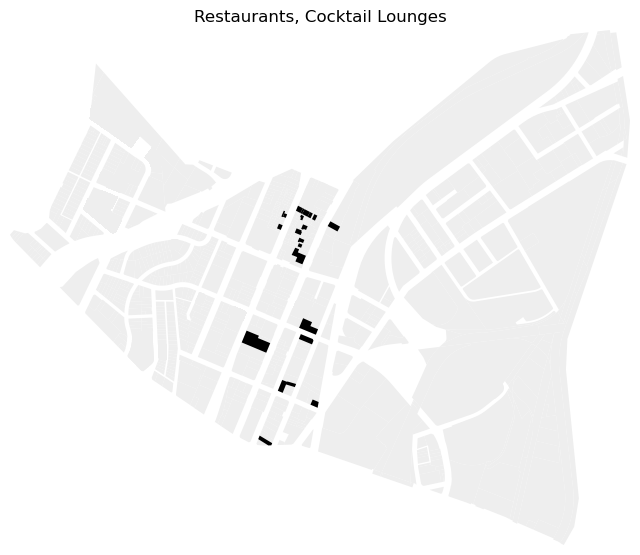

In [76]:
building_usage('Restaurants, Cocktail Lounges')

## Housing Type by Unit Analysis

Next, we will create a map that layers the different Use Description for housing onto the same map.

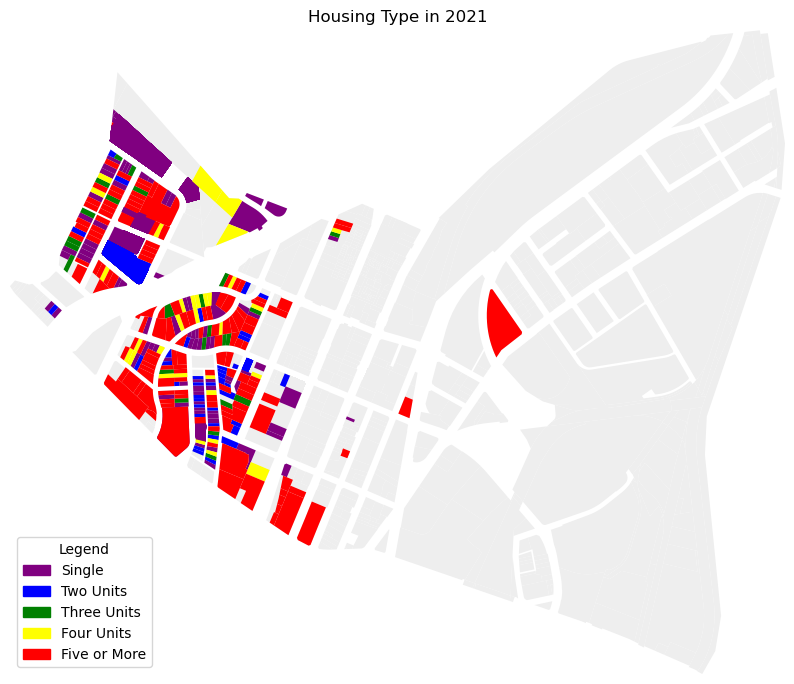

In [77]:
    fig, ax = plt.subplots(figsize=(10,10))
    
    # create the map plot
    AD21_clipped.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    AD21_clipped[AD21_clipped['UseDescrip'] == 'Single'].plot(ax=ax,
            # column='building',
            color='purple')
    
    AD21_clipped[AD21_clipped['UseDescrip'] == 'Two Units'].plot(ax=ax,
            # column='building',
            color='blue')
        
    AD21_clipped[AD21_clipped['UseDescrip'] == 'Three Units (Any Combination)'].plot(ax=ax,
            # column='building',
            color='green')
    
    AD21_clipped[AD21_clipped['UseDescrip'] == 'Four Units (Any Combination)'].plot(ax=ax,
            # column='building',
            color='yellow')
        
    AD21_clipped[AD21_clipped['UseDescrip'] == 'Five or more apartments'].plot(ax=ax,
            # column='building',
            color='red')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    ax.set_title('Housing Type in 2021')

    # get rid of the axis
    ax.axis('off')
    
    # Create a legend
    
    purple_patch = mpatches.Patch(color='purple', label='Single')
    blue_patch = mpatches.Patch(color='blue', label='Two Units')
    green_patch = mpatches.Patch(color='green', label='Three Units')
    yellow_patch = mpatches.Patch(color='yellow', label='Four Units')
    red_patch= mpatches.Patch(color='red', label='Five or More')
    
    ax.legend(handles=[purple_patch, blue_patch, green_patch, yellow_patch, red_patch],
             title = 'Legend',
             loc = 'lower left')

Create a variable for the 5 types of housing listed

In [78]:
housing = ['Single', 'Two Units', 'Three Units (Any Combination)', 'Four Units (Any Combination)','Five or more apartments']

Create a dataframe with only the housing variable 

In [79]:
housing_df = AD21_clipped.query('UseDescrip in @housing')

Get the frequency count of each item in the housing variable.

In [80]:
for key, group in u_groups.items():

    # Let's check how many rows each group has:
    print('Housing Type:', key)
    print('Count:', len(group), "\n")

Housing Type: Five or more apartments
Count: 136 

Housing Type: Four Units (Any Combination)
Count: 31 

Housing Type: Single
Count: 355 

Housing Type: Three Units (Any Combination)
Count: 24 

Housing Type: Two Units
Count: 64 

